In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import plotnine as pn
import seaborn as sns
import gseapy
from statannotations.Annotator import Annotator

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(3, 3), transparent=True, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
adjustText          NA
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bioservices         1.7.11
boto3               1.20.24
botocore            1.23.24
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
descartes           NA
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstr

In [9]:
heart_infection_sc = sc.read_h5ad(filename="./../../../pyobjs_github/heart_infection_sc_new.h5ad")

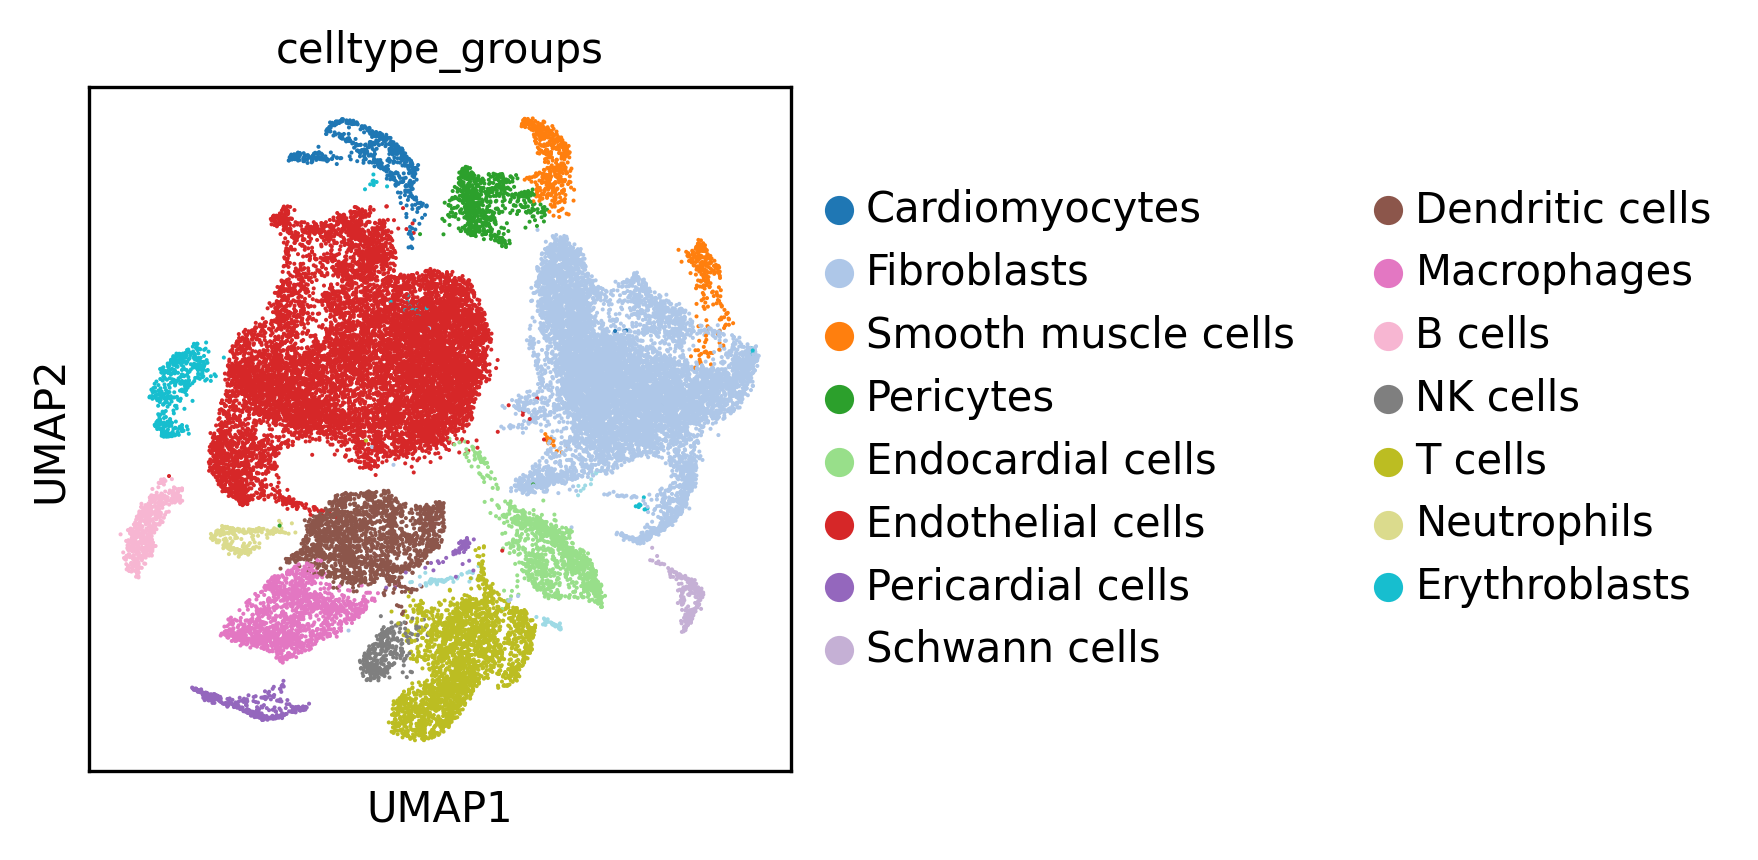

In [10]:
sc.pl.umap(heart_infection_sc, color = ['celltype_groups'], legend_fontsize=10)

In [11]:
heart_infection_sc

AnnData object with n_obs × n_vars = 31684 × 2247
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_groups_colors', 'celltypes_leiden_0.5_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups_celltypes_leiden_0.5', 'rank_genes_groups_leiden_0.3', 'rank_genes_gro

In [12]:
heart_infection_sc.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI",  "Mock_D7PI",  "T1L-WT_D7PI",  "Mock_D10PI", "T1L-WT_D10PI"], inplace = True)

<ipython-input-12-d6e76c3d218e>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


In [14]:
sc.tl.rank_genes_groups(heart_infection_sc, groupby = 'condition', groups= ["T1L-WT_D4PI"],
                        reference= 'Mock_D4PI', key_added='rank_genes_T1L-WT_vs_Mock_D4PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D4PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:20)


In [15]:
day4_WT_infection_markers = sc.get.rank_genes_groups_df(heart_infection_sc, group="T1L-WT_D4PI", key="rank_genes_T1L-WT_vs_Mock_D4PI")
# Genes with > 10 log fold change are sex specific genes like Xist, Tsix. 
day4_WT_infection_markers = day4_WT_infection_markers[day4_WT_infection_markers["logfoldchanges"] < 10]
day4_WT_infection_markers = day4_WT_infection_markers.sort_values(by= "scores", ascending=False)
print(day4_WT_infection_markers)
# day4_WT_infection_markers.to_csv("./../../../csvs_github/heart_IFN_genelist_D4PI.csv")
day4_WT_infection_markers_significant = day4_WT_infection_markers[day4_WT_infection_markers["logfoldchanges"] > 1.0]
day4_WT_infection_markers_significant = day4_WT_infection_markers_significant[day4_WT_infection_markers_significant["pvals_adj"] < 0.01]

          names     scores  logfoldchanges          pvals      pvals_adj
0        Ifitm3  85.555222        3.635777   0.000000e+00   0.000000e+00
1          Bst2  84.066872        5.022720   0.000000e+00   0.000000e+00
3         Isg15  79.678001        6.908294   0.000000e+00   0.000000e+00
4           B2m  77.476456        3.591180   0.000000e+00   0.000000e+00
5      Ifi27l2a  60.614697        5.020513   0.000000e+00   0.000000e+00
...         ...        ...             ...            ...            ...
22752    Sptbn1 -17.735380       -0.533346   2.235772e-70   5.716794e-68
22753    mt-Nd4 -18.523550       -0.392755   1.333486e-76   3.570134e-74
22754     Ddx3y -23.827291      -28.863832  1.741682e-125  6.392816e-123
22755   mt-Cytb -24.240606       -0.434230  8.306780e-130  3.316446e-127
22756     Nedd4 -25.726536       -0.830774  5.902083e-146  2.487291e-143

[22387 rows x 5 columns]


In [16]:
# Prepaing gene list for GO term ernichment analysis
de_results = day4_WT_infection_markers_significant
de_results = de_results[(de_results["logfoldchanges"] > 1.0) & (de_results["pvals_adj"] < 0.01)]
glist = de_results['names'].squeeze().str.strip().tolist()
print(len(glist))

230


In [13]:
# GO_Biological_Process_2021, KEGG_2019_Mouse, WikiPathways_2019_Mouse
# Using GO_Biological_Process_2021 gene sets for enrichment analysis
enr_res = gseapy.enrichr(gene_list=glist, 
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2021'],
                     description='pathway', 
                     cutoff = 0.01)

Connecting to Enrichr Server to get latest library names
Analysis name: pathway, Enrichr Library: GO_Biological_Process_2021
Save file of enrichment results: Job Id:e3795550a0a252b3cff26af05e769e54
Done.



In [14]:
GO_results = enr_res.results
GO_results["-log p-value"] =  -1 * np.log10(GO_results["Adjusted P-value"]) 
GO_results["Term"] = [x.split(" (")[0] for x in GO_results["Term"]]
GO_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,-log p-value
0,GO_Biological_Process_2021,cellular response to type I interferon,25/65,3.773950e-32,2.911602e-29,0,0,60.152439,4352.305711,IFITM3;SP100;ADAR;IFI35;IFIT1;SAMHD1;IFIT3;IFI...,28.535868
1,GO_Biological_Process_2021,type I interferon signaling pathway,25/65,3.773950e-32,2.911602e-29,0,0,60.152439,4352.305711,IFITM3;SP100;ADAR;IFI35;IFIT1;SAMHD1;IFIT3;IFI...,28.535868
2,GO_Biological_Process_2021,defense response to virus,28/133,1.475151e-27,7.587191e-25,0,0,25.960396,1603.860198,IFITM3;RTP4;NLRC5;IFIT1;SAMHD1;IFIT3;IFIT2;IFI...,24.119919
3,GO_Biological_Process_2021,defense response to symbiont,27/124,4.989139e-27,1.924560e-24,0,0,26.975319,1633.693657,IFITM3;RTP4;NLRC5;IFIT1;SAMHD1;IFIT3;IFIT2;IFI...,23.715668
4,GO_Biological_Process_2021,cytokine-mediated signaling pathway,44/621,1.777345e-22,5.484887e-20,0,0,7.868769,394.081720,IFITM3;SP100;CXCL9;SPI1;ADAR;IFI35;IFIT1;SAMHD...,19.260832
...,...,...,...,...,...,...,...,...,...,...,...
1538,GO_Biological_Process_2021,transcription by RNA polymerase II,1/320,9.760371e-01,9.785740e-01,0,0,0.266266,0.006458,IRF9,0.009406
1539,GO_Biological_Process_2021,"regulation of transcription, DNA-templated",17/2244,9.797090e-01,9.816176e-01,0,0,0.628714,0.012888,BATF2;CD74;SP100;DAXX;SPI1;DTX3L;SP110;PCGF5;S...,0.008058
1540,GO_Biological_Process_2021,gene expression,1/356,9.843108e-01,9.855883e-01,0,0,0.238822,0.003777,ADAR,0.006304
1541,GO_Biological_Process_2021,organelle organization,1/420,9.926244e-01,9.930474e-01,0,0,0.201676,0.001493,CCL2,0.003030


In [ ]:
# This is to select GO terms of interest from the significanlt enriched GO terms
# GO_results = GO_results.iloc[[1,2,3,4,5,7,12,13,14,15,18,21,23,24,27,29,30,33,34,35],]

<ipython-input-15-134b7e8a653c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
<ipython-input-15-134b7e8a653c>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


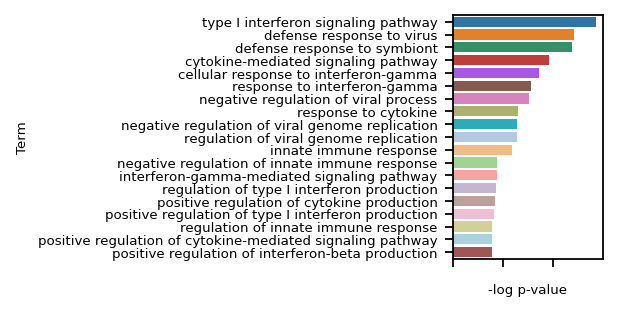

In [15]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(1.2,2.0))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(b=None)
g = sns.barplot(y = "Term", x = "-log p-value", data= GO_results[1:20], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.tight_layout()
plt.show()
# plt.savefig("figures/go_enrich.pdf", facecolor='w', edgecolor='w',
#         orientation='potrait', format="pdf",
#         transparent=True, metadata=None)

In [22]:
gene_list = list(list(day4_WT_infection_markers_significant["names"]))
print(gene_list)

['Bst2', 'Isg15', 'B2m', 'Ifi27l2a', 'Iigp1', 'H2-K1', 'Irf7', 'H2-D1', 'Ly6e', 'Psmb8', 'Ifit3', 'Ifit1', 'Gbp7', 'Ly6a', 'Rtp4', 'Lgals3bp', 'H2-Q7', 'Xaf1', 'H2-T23', 'Oasl2', 'Rsad2', 'Rnf213', 'Gbp3', 'Psmb9', 'Psmb10', 'Lgals9', 'Ifi203', 'Irgm1', 'Ifit2']


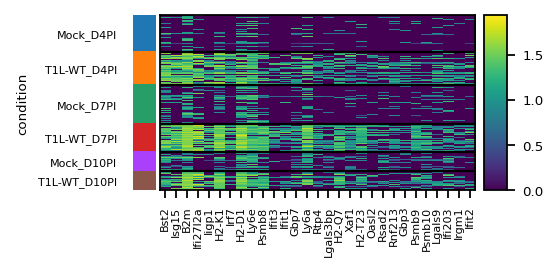

In [17]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.heatmap(heart_infection_sc[heart_infection_sc.obs["condition"].isin(["Mock_D4PI", "Mock_D7PI", "Mock_D10PI", "T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"]),:], var_names = gene_list, groupby="condition", log=True, show_gene_labels=True, figsize=(3,1.5))
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

In [23]:
sc.tl.score_genes(heart_infection_sc, gene_list, use_raw=True, score_name = 'Infection_response_score')

computing score 'Infection_response_score'
    finished: added
    'Infection_response_score', score of gene set (adata.obs).
    147 total control genes are used. (0:00:01)


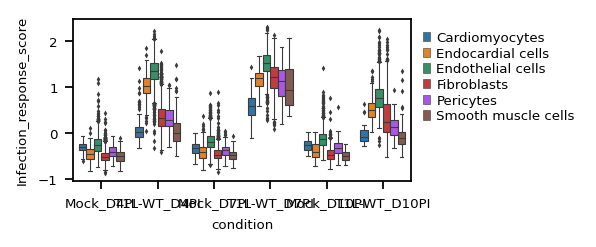

In [24]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(3.7, 1.5))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
sns.boxplot(data = heart_infection_sc[heart_infection_sc.obs['celltype_groups'].isin(["Cardiomyocytes", "Fibroblasts", "Endothelial cells", "Pericytes", "Smooth muscle cells", "Endocardial cells"]) & heart_infection_sc.obs['state'].isin(["Mock", "T1L-WT"])].obs, y= "Infection_response_score", x = "condition", linewidth = 0.5, fliersize = 0.5, hue = "celltype_groups", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.tight_layout()
plt.savefig("figures/IFN_cardiac.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Mock_D7PI_Endocardial cells vs. Mock_D7PI_Endothelial cells: Mann-Whitney-Wilcoxon test two-sided, P_val:3.599e-74 U_stat=1.674e+05
T1L-WT_D4PI_Endothelial cells vs. T1L-WT_D4PI_Fibroblasts: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=4.852e+06
Mock_D4PI_Endothelial cells vs. Mock_D4PI_Fibroblasts: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=5.436e+06
Mock_D4PI_Endocardial cells vs. Mock_D4PI_Endothelial cells: Mann-Whitney-Wilcoxon test two-sided, P_val:7.071e-49 U_stat=1.215e+05
T1L-WT_D4PI_Endocardial cells vs. T1L-WT_D4PI_Endothelial cells: Mann-Whitney-Wilcoxon test two-sided, P_val:5.351e-49 U_stat=1.138e+05
Mock_D7PI_Endothelial cells vs. Mock_D7PI_Fibroblasts: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=6.321e+06
Mock_D10PI_Endothelial cells vs. Mock

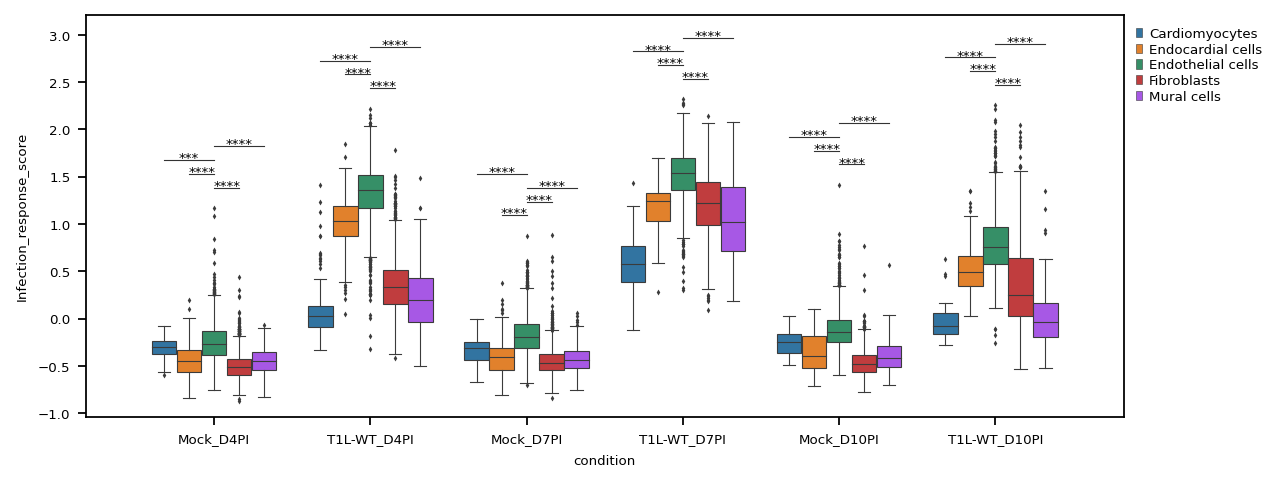

In [25]:
# sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
# fig, ax = plt.subplots(figsize=(8, 3))
# plt.rc('font', size=6)
# ax.set_axisbelow(True)
# plt.grid(False)
# sns.boxplot(data = heart_infection_sc[heart_infection_sc.obs['celltype_groups'].isin(["Cardiomyocytes", "Fibroblasts", "Endothelial cells", "Mural cells", "Endocardial cells"]) & heart_infection_sc.obs['state'].isin(["Mock", "T1L-WT"])].obs, y= "Infection_response_score", x = "condition", linewidth = 0.5, fliersize = 0.5, hue = "celltype_groups", ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
# plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# pairs=[(("Mock_D4PI", "Cardiomyocytes"), ("Mock_D4PI", "Endothelial cells")), 
#        (("Mock_D4PI", "Fibroblasts"), ("Mock_D4PI", "Endothelial cells")),
#        (("Mock_D4PI","Mural cells"), ("Mock_D4PI","Endothelial cells")),
#        (("Mock_D4PI", "Endocardial cells"), ("Mock_D4PI", "Endothelial cells")),
#       (("Mock_D7PI", "Cardiomyocytes"), ("Mock_D7PI", "Endothelial cells")), 
#        (("Mock_D7PI", "Fibroblasts"), ("Mock_D7PI", "Endothelial cells")),
#        (("Mock_D7PI","Mural cells"), ("Mock_D7PI","Endothelial cells")),
#        (("Mock_D7PI", "Endocardial cells"), ("Mock_D7PI", "Endothelial cells")),
#       (("Mock_D10PI", "Cardiomyocytes"), ("Mock_D10PI", "Endothelial cells")), 
#        (("Mock_D10PI", "Fibroblasts"), ("Mock_D10PI", "Endothelial cells")),
#        (("Mock_D10PI","Mural cells"), ("Mock_D10PI","Endothelial cells")),
#        (("Mock_D10PI", "Endocardial cells"), ("Mock_D10PI", "Endothelial cells")),
#       (("T1L-WT_D4PI", "Cardiomyocytes"), ("T1L-WT_D4PI", "Endothelial cells")), 
#        (("T1L-WT_D4PI", "Fibroblasts"), ("T1L-WT_D4PI", "Endothelial cells")),
#        (("T1L-WT_D4PI","Mural cells"), ("T1L-WT_D4PI","Endothelial cells")),
#        (("T1L-WT_D4PI", "Endocardial cells"), ("T1L-WT_D4PI", "Endothelial cells")),
#       (("T1L-WT_D7PI", "Cardiomyocytes"), ("T1L-WT_D7PI", "Endothelial cells")), 
#        (("T1L-WT_D7PI", "Fibroblasts"), ("T1L-WT_D7PI", "Endothelial cells")),
#        (("T1L-WT_D7PI","Mural cells"), ("T1L-WT_D7PI","Endothelial cells")),
#        (("T1L-WT_D7PI", "Endocardial cells"), ("T1L-WT_D7PI", "Endothelial cells")),
#       (("T1L-WT_D10PI", "Cardiomyocytes"), ("T1L-WT_D10PI", "Endothelial cells")), 
#        (("T1L-WT_D10PI", "Fibroblasts"), ("T1L-WT_D10PI", "Endothelial cells")),
#        (("T1L-WT_D10PI","Mural cells"), ("T1L-WT_D10PI","Endothelial cells")),
#        (("T1L-WT_D10PI", "Endocardial cells"), ("T1L-WT_D10PI", "Endothelial cells"))]
# annotator = Annotator(ax, pairs, data=heart_infection_sc[heart_infection_sc.obs['celltype_groups'].isin(["Cardiomyocytes", "Fibroblasts", "Endothelial cells", "Mural cells", "Endocardial cells"]) & heart_infection_sc.obs['state'].isin(["Mock", "T1L-WT"])].obs, x="condition", y="Infection_response_score", hue = "celltype_groups")
# annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', text_offset = -2, line_offset = -2, line_width = 0.5, line_height = 0, line_offset_to_group = 0)
# annotator.apply_and_annotate()
# plt.tight_layout()
# plt.show()

In [25]:
heart_infection_sc[heart_infection_sc.obs['celltype_groups'].isin(["Cardiomyocytes", "Fibroblasts", "Endothelial cells", "Pericytes", "Smooth muscle cells", "Endocardial cells"]) & heart_infection_sc.obs['state'].isin(["Mock", "T1L-WT"])].obs[["Infection_response_score", "condition", "celltype_groups"]].to_csv("./../../../csvs_github/heart_scRNAseq_WT_IRS.csv")